<a href="https://colab.research.google.com/github/ShubhamSShaha/Campus_recruitment_project/blob/Data_EDA/Campus_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,HR,58.80,Placed,270000.0
1,1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Fin,66.28,Placed,200000.0
2,2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Fin,57.80,Placed,250000.0
3,3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,HR,59.43,Not Placed,0.0
4,4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Fin,55.50,Placed,425000.0


In [5]:
df.describe()

,Unnamed: 0,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,107.000000,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,0.000000,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,53.500000,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,107.000000,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,160.500000,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,214.000000,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
df.columns


Index(['Unnamed: 0', 'sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b',
       'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation',
       'mba_p', 'status', 'salary'],
      dtype='object')

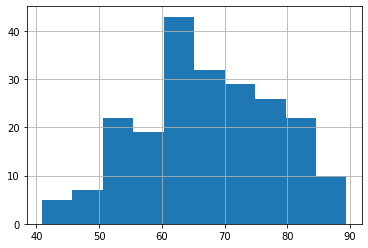

In [7]:
df.ssc_p.hist()

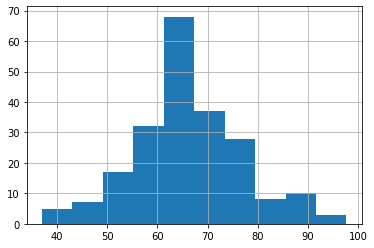

In [10]:
df.hsc_p.hist();



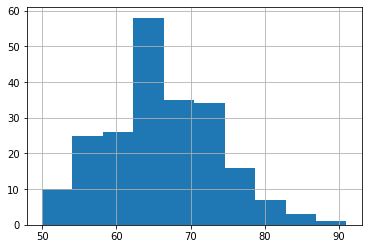

In [11]:
df.degree_p.hist();

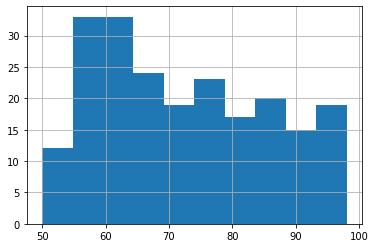

In [12]:
df.etest_p.hist();

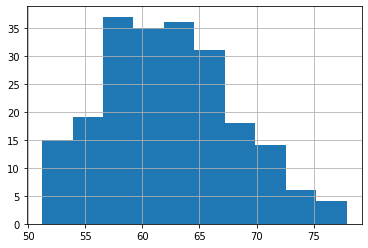

In [13]:
df.mba_p.hist();

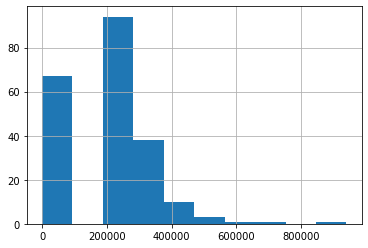

In [15]:
df.salary.hist()

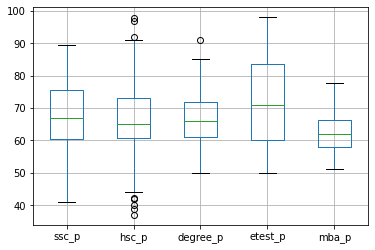

In [14]:
df.boxplot(column = ['ssc_p','hsc_p','degree_p','etest_p','mba_p'])

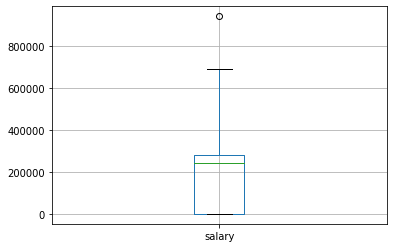

In [16]:
df.boxplot(column = ['salary'])

In [22]:
corr = df[['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']].corr()
corr

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


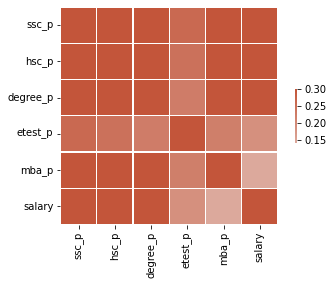

In [26]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.25, cbar_kws={"shrink": .25})

In [35]:
df_cat = df[['gender','ssc_b','hsc_b','hsc_s','degree_t', 'workex','specialisation','status']]

In [30]:
df.columns

Index(['Unnamed: 0', 'sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b',
       'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation',
       'mba_p', 'status', 'salary'],
      dtype='object')

graph for gender: total = 2


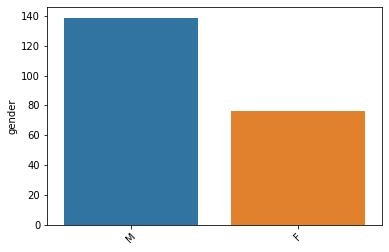

graph for ssc_b: total = 2


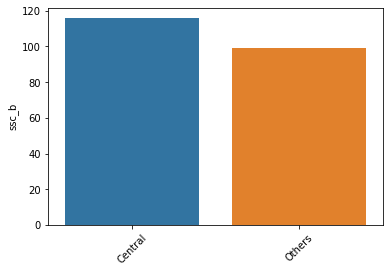

graph for hsc_b: total = 2


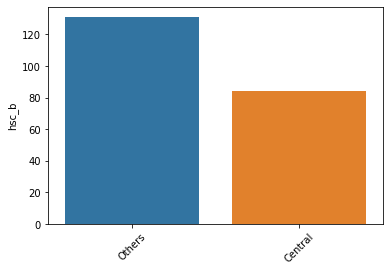

graph for hsc_s: total = 3


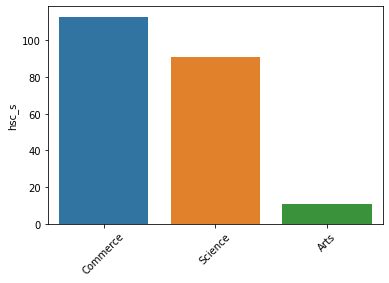

graph for degree_t: total = 3


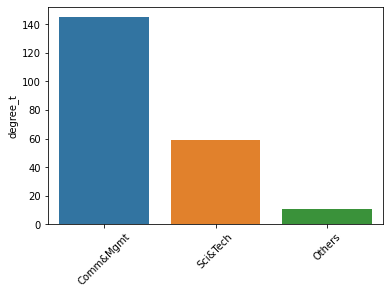

graph for workex: total = 2


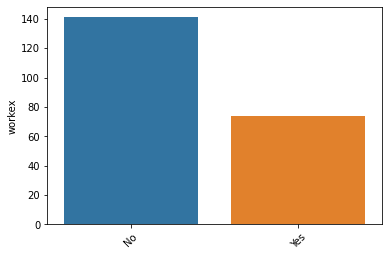

graph for specialisation: total = 2


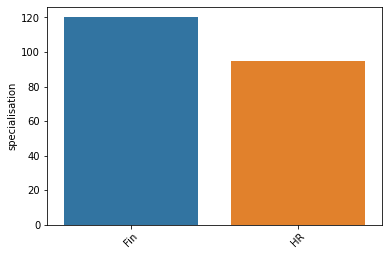

graph for status: total = 2


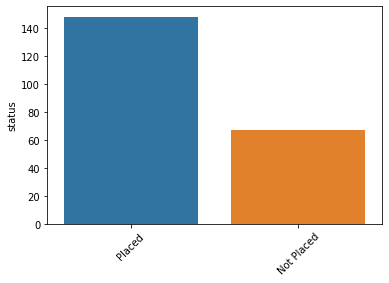

In [39]:
for i in df_cat.columns:
  cat_num = df_cat[i].value_counts()
  print("graph for %s: total = %d" % (i ,len(cat_num)))
  chart = sns.barplot(x=cat_num.index ,  y=cat_num)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
  plt.show()

In [41]:
df.columns

Index(['Unnamed: 0', 'sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b',
       'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation',
       'mba_p', 'status', 'salary'],
      dtype='object')

In [45]:
pd.pivot_table(df , index = ['ssc_b','hsc_b'] , values= 'salary')

salary
ssc_b   hsc_b                 
Central Central  201883.116883
        Others   177743.589744
Others  Central  137000.000000
        Others   209619.565217

In [46]:
pd.pivot_table(df , index = ['ssc_b','hsc_b','hsc_s'] , values= 'salary')

salary
ssc_b   hsc_b   hsc_s                  
Central Central Arts      171000.000000
                Commerce  205533.333333
                Science   202692.307692
        Others  Commerce  192631.578947
                Science   163600.000000
Others  Central Arts      230000.000000
                Commerce   75000.000000
                Science   168000.000000
        Others  Arts       59000.000000
                Commerce  208086.956522
                Science   225642.857143

In [48]:
pd.pivot_table(df , index = ['gender','workex','degree_t'] , values= 'salary')

salary
gender workex degree_t                
F      No     Comm&Mgmt  145842.105263
              Others     123000.000000
              Sci&Tech   139166.666667
       Yes    Comm&Mgmt  216400.000000
              Others     330000.000000
              Sci&Tech   244000.000000
M      No     Comm&Mgmt  180919.354839
              Others          0.000000
              Sci&Tech   199590.909091
       Yes    Comm&Mgmt  280500.000000
              Others     125000.000000
              Sci&Tech   280900.000000

In [49]:
pd.pivot_table(df , index = ['gender','specialisation','degree_t'] , values= 'salary')

salary
gender specialisation degree_t                
F      Fin            Comm&Mgmt  199333.333333
                      Others     300000.000000
                      Sci&Tech   248000.000000
       HR             Comm&Mgmt  122086.956522
                      Others     138000.000000
                      Sci&Tech   137500.000000
M      Fin            Comm&Mgmt  245410.714286
                      Others          0.000000
                      Sci&Tech   273120.000000
       HR             Comm&Mgmt  163583.333333
                      Others      83333.333333
                      Sci&Tech   187117.647059

In [52]:
pd.pivot_table(df , index = ['gender','specialisation','degree_t'] , values= 'salary', aggfunc = 'count',)

salary
gender specialisation degree_t         
F      Fin            Comm&Mgmt      30
                      Others          2
                      Sci&Tech        5
       HR             Comm&Mgmt      23
                      Others          4
                      Sci&Tech       12
M      Fin            Comm&Mgmt      56
                      Others          2
                      Sci&Tech       25
       HR             Comm&Mgmt      36
                      Others          3
                      Sci&Tech       17

In [53]:
df.columns

Index(['Unnamed: 0', 'sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b',
       'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation',
       'mba_p', 'status', 'salary'],
      dtype='object')

In [68]:
df_pivots = df[['gender','ssc_b','hsc_b','hsc_s','degree_t', 'workex',  'specialisation','salary']]
df_pivots.columns

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'salary'],
      dtype='object')

In [69]:
for i in df_pivots.columns:
  print(i)
  print(pd.pivot_table(df_pivots , index=i , values = 'salary'))

gender
               salary
gender               
F       168815.789474
M       215043.165468
ssc_b
                salary
ssc_b                 
Central  193767.241379
Others   204484.848485
hsc_b
                salary
hsc_b                 
Central  196476.190476
Others   200129.770992
hsc_s
                 salary
hsc_s                  
Arts      135636.363636
Commerce  200938.053097
Science   203549.450549
degree_t
                  salary
degree_t                
Comm&Mgmt  196000.000000
Others     127454.545455
Sci&Tech   218627.118644
workex
               salary
workex               
No      165333.333333
Yes     262283.783784
specialisation
                       salary
specialisation               
Fin             236591.666667
HR              150842.105263
salary


ValueError: ignored

In [71]:
df.to_csv('Campus_EDA.csv')
from google.colab import files
files.download("Campus_EDA.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>